<a href="https://colab.research.google.com/github/gizemir/Data-Visualization/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project contains data set from kaggle. In this dataset, the effects of working conditions on mental illnesses are listed. I made inferences and visualizations by analyzing the dataset.

We loaded the dataset

In [ ]:
import pandas as pd
import requests

file_id = "1QHIX9O7TebewgaiDwfrAuQ-bPgtqJqIH"
download_url = f"https://drive.google.com/uc?id={file_id}"

response = requests.get(download_url)
with open("dataset.csv", "wb") as file:
    file.write(response.content)


data = pd.read_csv("dataset.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

We have listed the first five rows of the dataset

In [ ]:
data_head = data.head()
data_head

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


We have listed the last five rows of the dataset

In [ ]:
data_tail = data.tail()
data_tail

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia
4999,EMP5000,29,Male,HR,IT,30,Onsite,20,15,1,Low,Depression,Yes,No Change,3,Unsatisfied,5,NaN,Poor,Asia


General information about the dataset (number of data, data type, etc.)

In [ ]:
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

List data types

In [ ]:
data.dtypes

,0
Employee_ID,object
Age,int64
Gender,object
Job_Role,object
Industry,object
Years_of_Experience,int64
Work_Location,object
Hours_Worked_Per_Week,int64
Number_of_Virtual_Meetings,int64
Work_Life_Balance_Rating,int64


In [ ]:
data.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


We listed missing value

In [ ]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0
Mental_Health_Condition,1196
Physical_Activity,1629


In [ ]:
data['Mental_Health_Condition'].fillna('Not mentioned', inplace=True)
data['Physical_Activity'].fillna('Not mentioned', inplace=True)

In [ ]:
data['Mental_Health_Condition'].isnull().sum()
data['Mental_Health_Condition'].value_counts()

,count
Mental_Health_Condition,
Burnout,1280
Anxiety,1278
Depression,1246
Not mentioned,1196


In [ ]:
data['Physical_Activity'].isnull().sum()
data['Physical_Activity'].value_counts()

,count
Physical_Activity,
Weekly,1755
Not mentioned,1629
Daily,1616


We listed duplicated rows

In [ ]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


1-How does work location influence the relationship between mental health conditions
and sleep quality among employees?

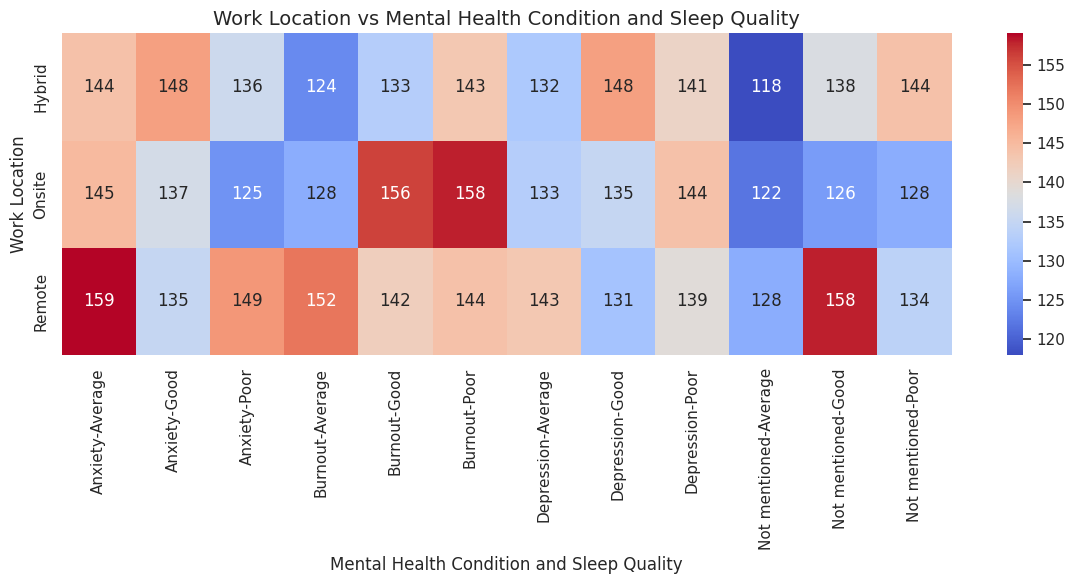

In [ ]:
#Work-Location, Mental-Health-Condition, Sleep-Quality

heatmap_data = data.pivot_table(
    index='Work_Location',
    columns=['Mental_Health_Condition', 'Sleep_Quality'],
    aggfunc='size',
    fill_value=0
)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", cbar=True)

plt.title("Work Location vs Mental Health Condition and Sleep Quality", fontsize=14)
plt.xlabel("Mental Health Condition and Sleep Quality", fontsize=12)
plt.ylabel("Work Location", fontsize=12)

plt.tight_layout()
plt.show()


2-How does Work-Life Balance Rating vary across different Job Roles and Genders?

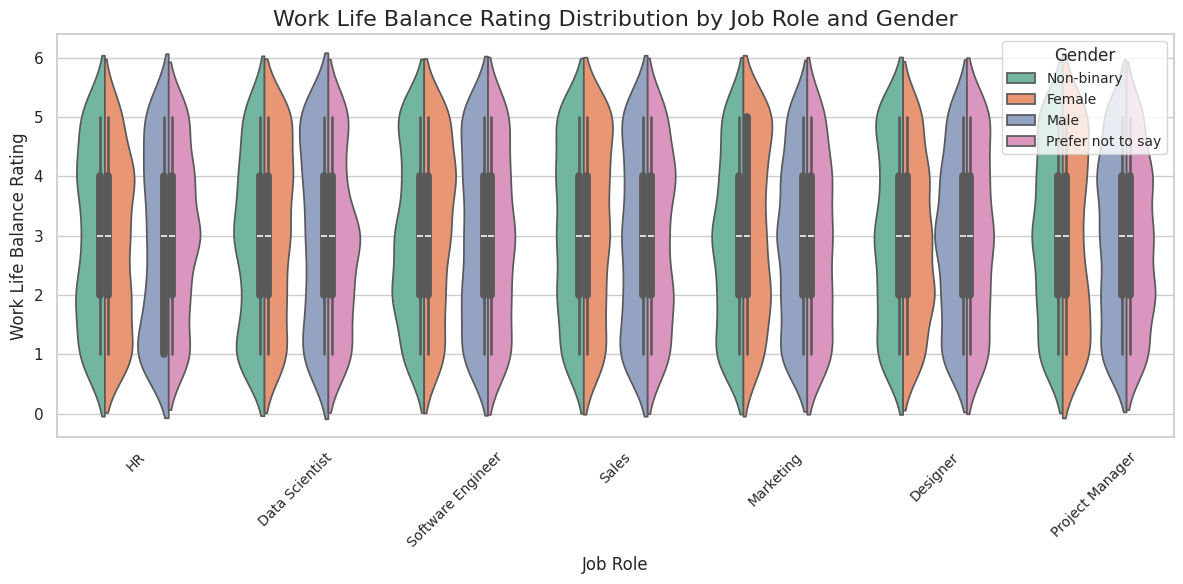

In [ ]:
#Job_Role, Gender, Work-Life-Balance-Rating

plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Job_Role', y='Work_Life_Balance_Rating', hue='Gender', split=True, palette='Set2')

plt.title('Work Life Balance Rating Distribution by Job Role and Gender', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Work Life Balance Rating', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Gender', fontsize=10)
plt.tight_layout()

plt.show()

3- How does access to mental health resources vary across different regions, and which mental health conditions are most prevalent in regions with or without access?

In [ ]:
#Acces-to-Mental-Health-Resources, Mental-Health-Condition, Regions
import plotly.express as px
import pandas as pd

creative_viz_data = data.groupby(['Region', 'Access_to_Mental_Health_Resources', 'Mental_Health_Condition']).size().reset_index(name='Count')

fig = px.sunburst(
    creative_viz_data,
    path=['Region', 'Access_to_Mental_Health_Resources', 'Mental_Health_Condition'],
    values='Count',
    color='Count',
    color_continuous_scale='Viridis',
    range_color=[700, creative_viz_data['Count'].max()],
    title="Access to Mental Health Resources and Mental Health Conditions Across Regions",
    labels={
        "Region": "Region",
        "Access_to_Mental_Health_Resources": "Access to Mental Health Resources",
        "Mental_Health_Condition": "Mental Health Condition",
        "Count": "Number of Employees"
    }
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    title_font_size=16,
    template="plotly_white",
    annotations=[
        dict(
            text="Colors indicate the number of employees (starting from 700)",
            x=0.5,
            y=-0.1,
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

fig.show()


4- How do mental health conditions and physical activity levels impact changes in
productivity, and what trends can be observed across different combinations?

In [ ]:
#Mental-Health-Conditions, Physical-Activity, Productivity-Change

import plotly.express as px

grouped_data = data.groupby(['Mental_Health_Condition', 'Physical_Activity', 'Productivity_Change']).size().reset_index(name='Count')

mental_health_mapping = {'Anxiety': 0, 'Depression': 1, 'None': 2}
grouped_data['Mental_Health_Num'] = grouped_data['Mental_Health_Condition'].map(mental_health_mapping)

physical_activity_mapping = {'Daily': 0, 'Weekly': 1, 'None': 2}
grouped_data['Physical_Activity_Num'] = grouped_data['Physical_Activity'].map(physical_activity_mapping)

productivity_mapping = {'Increase': 0, 'No Change': 1, 'Decrease': 2}
grouped_data['Productivity_Num'] = grouped_data['Productivity_Change'].map(productivity_mapping)

color_discrete_map = {
    'Increase': 'green',
    'No Change': 'blue',
    'Decrease': 'red'
}

fig = px.scatter_3d(
    grouped_data,
    x='Physical_Activity_Num',
    y='Mental_Health_Num',
    z='Productivity_Num',
    size='Count',
    color='Productivity_Change',
    color_discrete_map= color_discrete_map,
    hover_name='Mental_Health_Condition',
    hover_data={
        'Physical_Activity': True,
        'Productivity_Change': True,
        'Count': True
    },
    title='Mental Health Conditions, Physical Activity, and Productivity Change in 3D',
    labels={
        'Physical_Activity_Num': 'Physical Activity (Daily=0, Weekly=1, None=2)',
        'Mental_Health_Num': 'Mental Health (Anxiety=0, Depression=1, None=2)',
        'Productivity_Num': 'Productivity Change (Increase=0, No Change=1, Decrease=2)',
        'Count': 'Number of Records'
    },
    size_max=60
)


fig.update_traces(marker=dict(
    opacity=0.8,
    line=dict(width=2, color='Black')
))

fig.update_layout(
    legend_title="Productivity Change",
    template="plotly_white"
)


fig.show()


5- How does access to mental health resources vary across different work locations and stress levels?

In [ ]:
#Mental- Health-Resources, Stress-Level, Work-Location
import plotly.express as px
import pandas as pd

grouped_data = data.groupby(['Stress_Level', 'Work_Location', 'Access_to_Mental_Health_Resources']).size().reset_index(name='Count')

label_mapping = {
    'Low': 'Low Stress Level',
    'Medium': 'Medium Stress Level',
    'High': 'High Stress Level',
    'Hybrid': 'Hybrid Work Location',
    'Onsite': 'Onsite Work Location',
    'Remote': 'Remote Work Location',
    'Yes': 'Access to Mental Health Resources',
    'No': 'No Access to Mental Health Resources'
}

def map_labels(row):
    return [
        label_mapping.get(row['Stress_Level'], row['Stress_Level']),
        label_mapping.get(row['Work_Location'], row['Work_Location']),
        label_mapping.get(row['Access_to_Mental_Health_Resources'], row['Access_to_Mental_Health_Resources'])
    ]

grouped_data[['Mapped_Stress_Level', 'Mapped_Work_Location', 'Mapped_Resources']] = grouped_data.apply(map_labels, axis=1, result_type='expand')

fig = px.treemap(
    grouped_data,
    path=['Mapped_Stress_Level', 'Mapped_Work_Location', 'Mapped_Resources'],
    values='Count',
    title="Stress Level, Work Location, and Access to Mental Health Resources",
    color='Count',
    color_continuous_scale='Viridis',
    hover_data={'Count': True}
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()
